In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

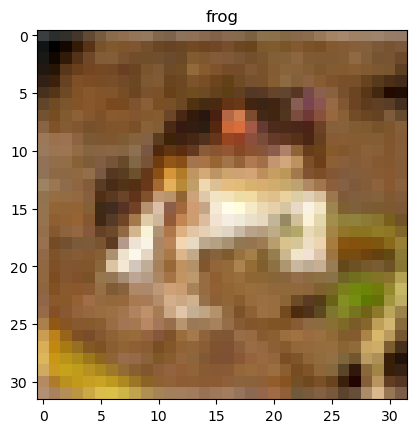

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

label_names = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display a sample image
plt.imshow(train_images[0])
plt.title(label_names[train_labels[0][0]])
plt.show()

In [3]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode labels
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

In [4]:
# Split training data for validation
validation_size = int(train_images.shape[0] * 0.2)
x_train, x_val = train_images[validation_size:], train_images[:validation_size]
y_train, y_val = train_labels_cat[validation_size:], train_labels_cat[:validation_size]

In [5]:
# Build the first neural network
first_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(10, activation='softmax')
    
])
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the first model
first_model_history = first_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5197 - accuracy: 0.4675 - val_loss: 1.2787 - val_accuracy: 0.5534
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2223 - accuracy: 0.5751 - val_loss: 1.1895 - val_accuracy: 0.5887
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1115 - accuracy: 0.6187 - val_loss: 1.1496 - val_accuracy: 0.6022
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0389 - accuracy: 0.6429 - val_loss: 1.1013 - val_accuracy: 0.6223
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9874 - accuracy: 0.6605 - val_loss: 1.1253 - val_accuracy: 0.6140
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9395 - accuracy: 0.6804 - val_loss: 1.1687 - val_accuracy: 0.6012
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9038 - accuracy: 0.6912 - val_loss: 1.0772 - val_accuracy:

In [7]:
first_model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [8]:
metrics1 = pd.DataFrame(first_model.history.history)
metrics1

,loss,accuracy,val_loss,val_accuracy
0,1.519709,0.467500,1.278736,0.5534
1,1.222270,0.575075,1.189522,0.5887
2,1.111500,0.618750,1.149562,0.6022
3,1.038919,0.642925,1.101257,0.6223
4,0.987377,0.660525,1.125340,0.6140
5,0.939498,0.680375,1.168734,0.6012
6,0.903826,0.691150,1.077171,0.6241
7,0.867979,0.703800,1.051590,0.6447
8,0.838507,0.713075,1.090420,0.6272
9,0.815802,0.721500,1.042552,0.6485


In [9]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 10)                72010     
                                                                 
Total params: 72906 (284.79 KB)
Trainable params: 72906 (284.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


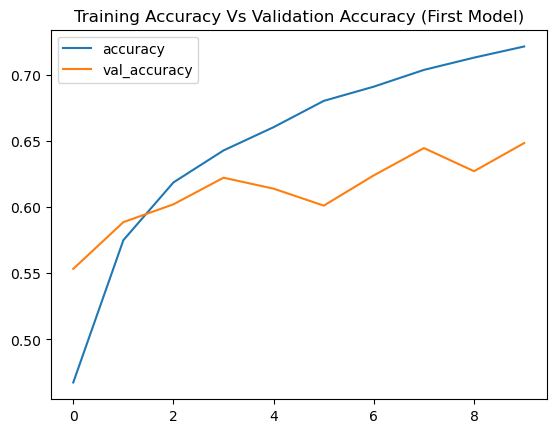

In [10]:
metrics1[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy (First Model)', fontsize=12)
plt.show()

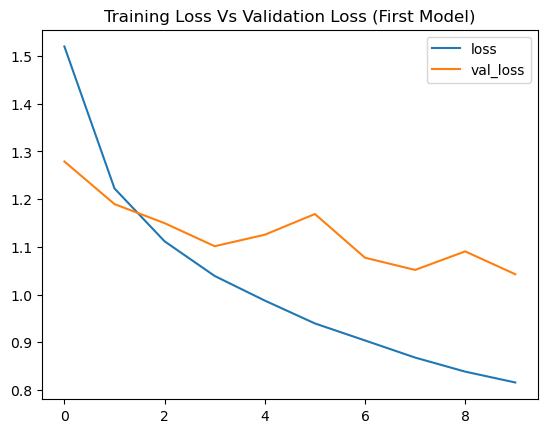

In [11]:
metrics1[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss (First Model)', fontsize=12)
plt.show()

In [12]:
# Build the second neural network

second_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation='softmax')
])

second_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the second model
second_model_history = second_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5834 - accuracy: 0.4257 - val_loss: 1.3587 - val_accuracy: 0.5024
Epoch 2/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2283 - accuracy: 0.5657 - val_loss: 1.1670 - val_accuracy: 0.5884
Epoch 3/10
1250/1250 [==============================] - 18s 14ms/step - loss: 1.0800 - accuracy: 0.6216 - val_loss: 1.0584 - val_accuracy: 0.6297
Epoch 4/10
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9955 - accuracy: 0.6531 - val_loss: 1.0080 - val_accuracy: 0.6338
Epoch 5/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9185 - accuracy: 0.6790 - val_loss: 0.9631 - val_accuracy: 0.6654
Epoch 6/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8660 - accuracy: 0.6980 - val_loss: 0.9293 - val_accuracy: 0.6758
Epoch 7/10
1250/1250 [==============================] - 14s 11ms/step - loss: 0.8139 - accuracy: 0.7172 - val_loss: 0.9421 -

In [14]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 64)               

In [15]:
metrics2 = pd.DataFrame(second_model.history.history)
metrics2

,loss,accuracy,val_loss,val_accuracy
0,1.583367,0.425750,1.358703,0.5024
1,1.228324,0.565675,1.167006,0.5884
2,1.080035,0.621600,1.058391,0.6297
3,0.995534,0.653100,1.008034,0.6338
4,0.918495,0.678975,0.963128,0.6654
5,0.865961,0.697975,0.929265,0.6758
6,0.813908,0.717175,0.942054,0.6780
7,0.772108,0.733050,0.926284,0.6744
8,0.730930,0.746950,0.928497,0.6851
9,0.695611,0.758175,0.948675,0.6813


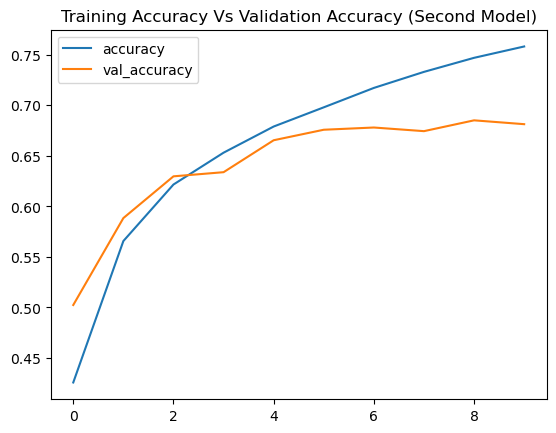

In [16]:
metrics2[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy (Second Model)', fontsize=12)
plt.show()

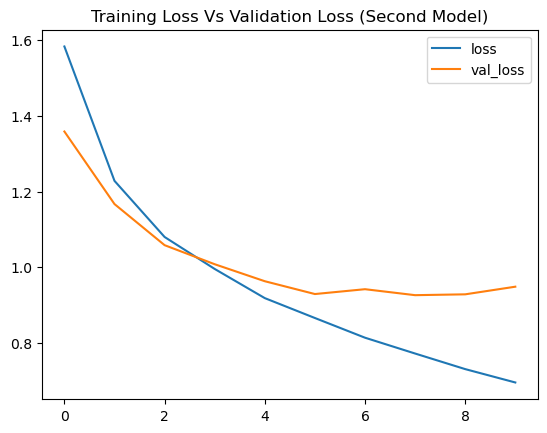

In [17]:
metrics2[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss (Second Model)', fontsize=12)
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.9773 - accuracy: 0.6736
First Model CNN Accuracy: 0.6407999992370605
Second Model CNN Accuracy: 0.6736000180244446


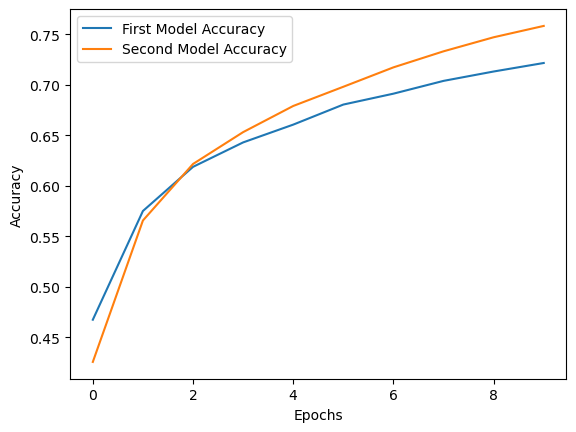

In [18]:
# Evaluate models
first_eval = first_model.evaluate(test_images, test_labels_cat)
second_eval = second_model.evaluate(test_images, test_labels_cat)

# Print evaluation results
print("First Model CNN Accuracy:", first_eval[1])
print("Second Model CNN Accuracy:", second_eval[1])

# Compare models using plots
plt.plot(first_model_history.history['accuracy'], label='First Model Accuracy')
plt.plot(second_model_history.history['accuracy'], label='Second Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = second_model.predict(x_val)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)
y_val = np.argmax(y_val, axis=1)


313/313 [==============================] - 1s 3ms/step


In [20]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.69      1005
           1       0.70      0.89      0.78       974
           2       0.61      0.53      0.57      1032
           3       0.52      0.49      0.51      1016
           4       0.64      0.68      0.66       999
           5       0.52      0.67      0.58       937
           6       0.74      0.78      0.76      1030
           7       0.81      0.69      0.75      1001
           8       0.75      0.82      0.78      1025
           9       0.90      0.61      0.73       981

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [21]:
# Print the confusion matrix
print(confusion_matrix(y_val, y_pred))

[[648  44  56  30  22  22   7  10 148  18]
 [ 16 870   9  12   5   9  15   2  16  20]
 [ 69  12 546  69 102 101  70  28  30   5]
 [ 17  15  63 501  70 224  81  20  15  10]
 [ 21   4  71  41 684  56  45  64  10   3]
 [  6   8  47 154  32 625  27  30   8   0]
 [  6  12  34  68  52  44 805   2   5   2]
 [ 19  12  39  47  81  89  12 694   5   3]
 [ 48  59  19  12  11  16  12   2 840   6]
 [ 32 209  14  27   4  27  12   8  48 600]]
